## Importation/Combination/Exportation of Features & Label Datasets

In [1]:
# Importation Of Relevant Libraries
import pandas as pd # Importation of Panda Library
import numpy as np # Importation of Numpy Library
import matplotlib.pyplot as plt # Importation of Graph Foundations 
import seaborn as sns # Importation of Seaborn For Fancy Charts
sns.set() # Seaborn Defaults For Plot Charting
from mpl_toolkits.mplot3d import Axes3D # 3D Visualisation Enabler
import datetime
import pickle
import sklearn
from sklearn.externals import joblib 
from sklearn import preprocessing
import statistics
dp = preprocessing.LabelEncoder()
%matplotlib inline
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Listing of Dataset Files

In [2]:
# Consolidation of Feature Dataset File Names
featureFileList = os.listdir("../Dataset/Features")

# Consolidation of Label Dataset File Names
labelFileList = os.listdir("../Dataset/Label")

In [3]:
print(featureFileList)
print(labelFileList)

['part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv']
['part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000 (1).csv']


Importation & Combination of Feature Dataset Files

In [4]:
# Importation & Combination of Feature Dataset CSV File (Run Once)
dataset = pd.DataFrame(columns=['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed'])
for i in featureFileList:
    incomingdataset = pd.read_csv("../Dataset/Features/" + i)
    dataset = pd.concat([dataset, incomingdataset])
    
# Importation of Label CSV File
labeldataset = pd.DataFrame(columns=['bookingID', 'label'])
for i in labelFileList:
    incomingdataset = pd.read_csv("../Dataset/Label/" + i)
    labeldataset = pd.concat([labeldataset, incomingdataset])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613561
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       object 
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
dtypes: float64(10), object(1)
memory usage: 1.4+ GB


In [6]:
labeldataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20018 entries, 0 to 20017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bookingID  20018 non-null  object
 1   label      20018 non-null  object
dtypes: object(2)
memory usage: 469.2+ KB


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Accuracy,16135561.0,11.610352,8.691672e+01,0.750000,3.900000,4.250000,8.000000,6.070101e+03
Bearing,16135561.0,168.968356,1.072966e+02,0.000000,78.000000,168.870041,262.984039,3.599995e+02
acceleration_x,16135561.0,0.069145,1.424161e+00,-78.419685,-0.508124,0.061371,0.635062,6.687346e+01
acceleration_y,16135561.0,4.468976,8.130664e+00,-72.994119,-2.022476,9.081485,9.709778,7.505589e+01
acceleration_z,16135561.0,0.894297,3.251549e+00,-78.448420,-0.931610,0.775745,2.750938,7.805576e+01
gyro_x,16135561.0,-0.001711,1.445619e-01,-48.455750,-0.026789,-0.000643,0.023306,3.983975e+01
gyro_y,16135561.0,0.000280,3.400630e-01,-74.888610,-0.029939,0.000265,0.031431,8.031496e+01
gyro_z,16135561.0,-0.000257,1.480824e-01,-53.554450,-0.018765,-0.000035,0.018234,6.630078e+01
second,16135561.0,3803.484183,1.436686e+06,0.000000,241.000000,520.000000,863.000000,1.495797e+09
Speed,16135561.0,9.006543,8.106415e+00,-2.000000,1.020000,7.530000,15.480000,1.480186e+02


In [8]:
labeldataset.describe().T

,count,unique,top,freq
bookingID,20018,20000,395136991308,2
label,20018,2,0,15017


In [9]:
# Checking For Null Values
dataset.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

In [10]:
labeldataset.isnull().sum()

bookingID    0
label        0
dtype: int64

Combination of Feature Dataset & Label Dataset (Label)

In [11]:
# Combination of Feature Dataset & Label Dataset (Label)
finaldataset = pd.merge(dataset, labeldataset, on='bookingID')

In [12]:
finaldataset

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000,1
1,1202590843006,3.033,77.000000,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000,1
2,1202590843006,6.173,283.000000,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286,1
3,1202590843006,3.014,353.000000,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000,1
4,1202590843006,5.209,340.000000,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16154413,317827579936,8.000,115.885414,0.063156,-1.003891,-0.083359,-0.052901,-0.097304,0.041136,27.0,1.392740,1
16154414,317827579936,8.000,47.230186,-0.197113,-0.981949,-0.101593,0.441228,0.422166,-0.106779,483.0,23.038746,1
16154415,317827579936,8.000,49.288242,0.115082,-0.999496,-0.358963,0.004464,-0.131621,0.047673,497.0,24.240860,1
16154416,317827579936,8.000,47.243069,0.029068,-1.013062,-0.033157,-0.071321,0.015111,-0.001533,505.0,12.871749,1


Exportation of Final Dataset

In [13]:
#----------------------EXPORTATION OF FINAL DATASET-------------------------
# Exportation of Final Dataset (EXPORT FINAL DATASET)
#finaldataset.to_csv("../Dataset/finalDataset.csv", header=True, index=False)

## Importation of Final Dataset

In [14]:
#----------------------IMPORTATION AND LOADING OF DATA-------------------------
#dataset = pd.read_csv('../Dataset/finalDataset.csv', skipinitialspace=True)

In [15]:
dataset

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000,1
1,1202590843006,3.033,77.000000,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000,1
2,1202590843006,6.173,283.000000,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286,1
3,1202590843006,3.014,353.000000,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000,1
4,1202590843006,5.209,340.000000,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16154413,317827579936,8.000,115.885414,0.063156,-1.003891,-0.083359,-0.052901,-0.097304,0.041136,27.0,1.392740,1
16154414,317827579936,8.000,47.230186,-0.197113,-0.981949,-0.101593,0.441228,0.422166,-0.106779,483.0,23.038746,1
16154415,317827579936,8.000,49.288242,0.115082,-0.999496,-0.358963,0.004464,-0.131621,0.047673,497.0,24.240860,1
16154416,317827579936,8.000,47.243069,0.029068,-1.013062,-0.033157,-0.071321,0.015111,-0.001533,505.0,12.871749,1


## Aggregation of Data

In [16]:
dataset = dataset.groupby(['bookingID'],as_index=False)
holder1= dataset.agg({'second' : np.max})
dataset = dataset.mean()
dataset=dataset.drop(['second'], axis=1)
dataset = pd.merge(dataset,holder1,on='bookingID')

In [17]:
dataset = dataset[dataset['label'] != 0.5]

In [18]:
X = dataset.drop(columns=['label', 'bookingID', 'Accuracy'], axis = 1)

In [19]:
y = dataset['label']

In [20]:
X

,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,second
0,176.526099,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,8.994822,1589.0
1,124.198590,-0.525406,9.532086,-2.198999,-0.002467,-0.007540,0.000405,7.881588,1034.0
2,173.794872,0.306786,9.843183,0.139347,0.006458,-0.012861,0.002597,3.157213,825.0
3,151.807013,-0.365117,-9.406439,-2.613639,-0.022884,0.023232,-0.000376,6.150996,1094.0
4,197.812785,0.490616,9.538043,2.355059,0.003877,0.000436,0.002930,4.628921,1094.0
...,...,...,...,...,...,...,...,...,...
19995,169.904096,0.094130,1.860878,9.668742,0.006799,-0.008030,-0.003830,2.305969,1153.0
19996,179.182557,0.625696,-8.680648,-4.512526,-0.016472,0.006266,-0.001241,7.611645,809.0
19997,198.738462,-0.208879,9.072497,3.319529,0.000408,0.000600,0.001489,12.718705,989.0
19998,204.802228,0.669512,8.896987,3.759712,0.003282,-0.000685,-0.000242,6.245733,1079.0


In [21]:
y

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    1.0
19999    1.0
Name: label, Length: 19982, dtype: float64

## Splitting of Dataset For Machine Learning Process

In [22]:
#---------------------------Splitting of Data----------------------------------
# Importation Model Selection Libraries
from sklearn.model_selection import train_test_split

In [23]:
# Splitting and Allocation of Training and Test Data For Weak Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=3)

## Machine Model Model

In [24]:
#------------------------------------------------------------------------------
# MODEL DEVELOPMENT
# Importation of Algorithm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
#from sklearn.kernel_approximation import RBFSampler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [25]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 71.5036%
Log Loss: 3.892876232220819
SVC
****Results****
Accuracy: 75.4566%
Log Loss: 0.557328888718321
DecisionTreeClassifier
****Results****
Accuracy: 67.0253%
Log Loss: 11.389068623590761
RandomForestClassifier
****Results****
Accuracy: 77.5331%
Log Loss: 0.5119183169756745
AdaBoostClassifier
****Results****
Accuracy: 77.6082%
Log Loss: 0.6821781583103684
GradientBoostingClassifier
****Results****
Accuracy: 77.7333%
Log Loss: 0.49214143598140914
GaussianNB
****Results****
Accuracy: 24.5434%
Log Loss: 6.573238506596177
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.4566%
Log Loss: 0.5518607982228403
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 24.6435%
Log Loss: 5.137879315581971


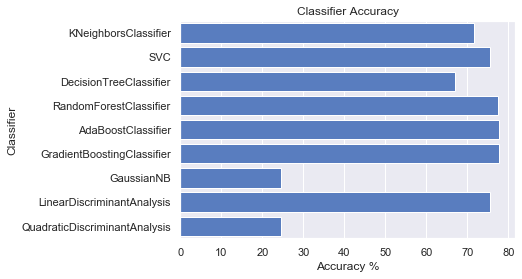

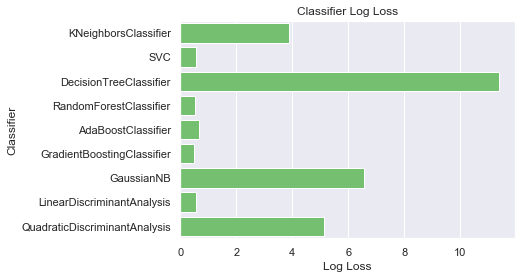

In [26]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Importation of Scoring Metrics

In [27]:
#------------------------------------------------------------------------------
# Importation of Scoring Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn import metrics

In [28]:
#------------------------------------------------------------------------------
# Instantiation of Model
machineModel = RandomForestClassifier()
#clf = GradientBoostingClassifier()
#clf = svm.SVC(kernel='rbf', C=0.025)
#clf = MLPClassifier(solver='adam', alpha=0.001,hidden_layer_sizes=(100,))

## Machine Model Prediction

In [29]:
# SVM Model Fitting
machineModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# SVM Model Prediction
y_hat = machineModel.predict(X_test)

## Scoring of Model

In [31]:
# Scoring of Support Vector Model
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_test, y_hat)
print("Precision of Weak Model = ", precision[1])
print("Recall of Weak Model = ", recall[1])
print("fbeta_score of Weak Model = ", fbeta_score[1])
print("Support of Weak Model = ", support[1])
print('Accuracy of Weak Random Forest Model', round(accuracy_score(y_test, y_hat) * 100, 2))

Precision of Weak Model =  0.6234939759036144
Recall of Weak Model =  0.21100917431192662
fbeta_score of Weak Model =  0.3153084539223153
Support of Weak Model =  981
Accuracy of Weak Random Forest Model 77.51


Text(0.5, 1, 'Heat Map of Confusion Matrix 1')

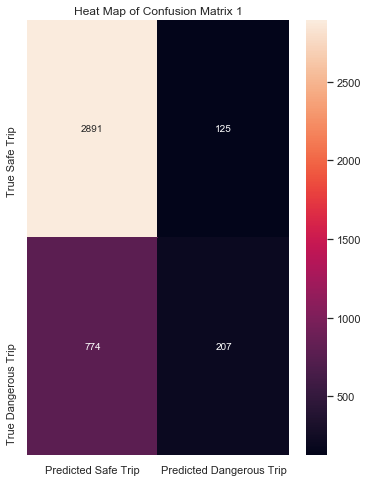

In [32]:
# Confusion Matrix Configurations
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)

# Names For Index of Confusion Matrix
trueClassName = ['True Safe Trip', 'True Dangerous Trip']

# Names For Column of Confusion Matrix
PredClassName = ['Predicted Safe Trip', 'Predicted Dangerous Trip']

# Computation of Confusion Matrix 1
confMatrx1 = confusion_matrix(y_test, y_hat)

# Computation of Confusion Matrix 2
#confMatrx2 = confusion_matrix(y_test, y_hat2)

# Establishment of Dataframe of Confusion Matrix 1
confMatrxDataFrame1 = pd.DataFrame(confMatrx1, index = trueClassName, columns = PredClassName)

# Establishment of Dataframe of Confusion Matrix 2
#confMatrxDataFrame1 = pd.DataFrame(confMatrx2, index = trueClassName, columns = PredClassName)

# Display of Confusion Matrix 1 - Number Format 
sns.heatmap(confMatrxDataFrame1, annot = True, fmt='d', ax=ax1).set_title('Heat Map of Confusion Matrix 1')

# Display of Confusion Matrix 1 - Number Format 
#sns.heatmap(confMatrxDataFrame2, annot = True, fmt='d', ax=ax2).set_title('Heat Map of Confusion Matrix 2')

## Exportation Of Machine Model

In [33]:
# Creation of The Machine Models Folder
filename = "../Machine Model"
os.makedirs(filename, exist_ok=True)

In [34]:
# Exportation of Machine Learning Model
joblib.dump(machineModel, "../Machine Model/MachineModel.pkl")
print("Exported Machine Model To Machine Model Folder")

Exported Machine Model To Current Directory
